<a href="https://colab.research.google.com/github/budhiacharya/AI-Lesson/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # PROJECT 1: DATA COLLECTION & INITIAL ANALYSIS
  - Daily Historical Stock Prices (1970–2020)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1. Load the data

In [4]:
prices = pd.read_csv("historical_stock_prices.csv")
stocks = pd.read_csv("historical_stocks.csv")

print("prices columns:", prices.columns)
print("stocks columns:", stocks.columns)

print("\nStock prices dataset:")
print(prices.head())
print("\nStocks dataset:")
print(stocks.head())

prices columns: Index(['ticker', 'open', 'close', 'adj_close', 'low', 'high', 'volume',
       'date'],
      dtype='object')
stocks columns: Index(['ticker', 'exchange', 'name', 'sector', 'industry'], dtype='object')

Stock prices dataset:
  ticker   open  close  adj_close    low   high     volume        date
0    AHH  11.50  11.58   8.493155  11.25  11.68  4633900.0  2013-05-08
1    AHH  11.66  11.55   8.471151  11.50  11.66   275800.0  2013-05-09
2    AHH  11.55  11.60   8.507822  11.50  11.60   277100.0  2013-05-10
3    AHH  11.63  11.65   8.544494  11.55  11.65   147400.0  2013-05-13
4    AHH  11.60  11.53   8.456484  11.50  11.60   184100.0  2013-05-14

Stocks dataset:
  ticker exchange                                    name             sector  \
0    PIH   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.            FINANCE   
1  PIHPP   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.            FINANCE   
2   TURN   NASDAQ                180 DEGREE CAPITAL CORP.            FINANCE

# 2. Data Cleaning

In [5]:
# Convert 'date' column to datetime
prices['date'] = pd.to_datetime(prices['date'], errors='coerce')
prices.set_index('date', inplace=True)

In [6]:
# Missing values
prices = prices.ffill() # Forward fill (fills using previous valid value)

# Show missing values after cleaning
print("\nMissing values in prices dataset:")
print(prices.isnull().sum())

print("\nMissing values in stocks dataset:")
print(stocks.isnull().sum())

# Remove duplicate rows
prices.drop_duplicates(inplace=True)
stocks.drop_duplicates(inplace=True)



Missing values in prices dataset:
ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
dtype: int64

Missing values in stocks dataset:
ticker         0
exchange       0
name           0
sector      1440
industry    1440
dtype: int64


# 3. Merge prices and company info

In [7]:
# Merge stock prices with stock info (sector, industry, name)
merged = prices.merge(stocks, on="ticker", how="left")

# Restore the date index
merged.index = prices.index

# Preview the merged dataset
print("\nMerged dataset with sector information:")
print(merged.head())


Merged dataset with sector information:
           ticker   open  close  adj_close    low   high     volume exchange  \
date                                                                           
2013-05-08    AHH  11.50  11.58   8.493155  11.25  11.68  4633900.0     NYSE   
2013-05-09    AHH  11.66  11.55   8.471151  11.50  11.66   275800.0     NYSE   
2013-05-10    AHH  11.55  11.60   8.507822  11.50  11.60   277100.0     NYSE   
2013-05-13    AHH  11.63  11.65   8.544494  11.55  11.65   147400.0     NYSE   
2013-05-14    AHH  11.60  11.53   8.456484  11.50  11.60   184100.0     NYSE   

                                       name   sector     industry  
date                                                               
2013-05-08  ARMADA HOFFLER PROPERTIES, INC.  FINANCE  REAL ESTATE  
2013-05-09  ARMADA HOFFLER PROPERTIES, INC.  FINANCE  REAL ESTATE  
2013-05-10  ARMADA HOFFLER PROPERTIES, INC.  FINANCE  REAL ESTATE  
2013-05-13  ARMADA HOFFLER PROPERTIES, INC.  FINANCE  REAL

# 4. CREATE YEAR and DECADE

In [8]:
# Create year and decade columns
merged['year'] = merged.index.year
merged['decade'] = (merged['year'] // 10) * 10
# See how many rows per decade
print("\nDecade counts:")
print(merged['decade'].value_counts().sort_index())



Decade counts:
decade
1970.0      48932
1980.0     531019
1990.0    1318716
2000.0    2637120
2010.0    3738255
Name: count, dtype: int64


# 5. SPLIT INTO DECADES

In [17]:
# Split into separate DataFrames by decade
decades = {}
for d in sorted(merged['decade'].unique()):
      if pd.isna(d):
        continue  # skip the NaN decade
      decades[d] = merged[merged['decade'] == d]
      print(f"Rows in decade {d}: {len(decades[d])}")

Rows in decade 1970.0: 48932
Rows in decade 1980.0: 531019
Rows in decade 1990.0: 1318716
Rows in decade 2000.0: 2637120
Rows in decade 2010.0: 3738255


# 6. SUMMARY STATISTICS

In [18]:
summary = {
    d: decades[d][['open','high','low','close','volume']].describe()
    for d in decades
}

print("\nSummary for 1990s:")
print(summary[1990])


Summary for 1990s:
               open          high           low         close        volume
count  1.318716e+06  1.318716e+06  1.318716e+06  1.318716e+06  1.318716e+06
mean   3.496031e+01  3.591370e+01  3.398492e+01  3.493492e+01  8.515440e+05
std    9.791433e+02  1.017512e+03  9.437486e+02  9.803044e+02  6.646680e+06
min    2.400000e-02  2.400000e-02  2.400000e-02  2.400000e-02  1.000000e+00
25%    5.062500e+00  5.157345e+00  5.000000e+00  5.062500e+00  1.120000e+04
50%    1.025000e+01  1.043309e+01  1.012500e+01  1.025000e+01  5.520000e+04
75%    1.862500e+01  1.887500e+01  1.834375e+01  1.862500e+01  2.911000e+05
max    2.334375e+05  2.465625e+05  2.231250e+05  2.353125e+05  1.047620e+09


In [19]:
# Calculate summary statistics (mean, median, std) for each decade
summary_stats = {}

for d, df in decades.items():
    selected = df[['open', 'high', 'low', 'close', 'volume']]

    summary_stats[d] = {
        "mean": selected.mean(),
        "median": selected.median(),
        "std": selected.std()
    }

# Print the results
for d in summary_stats:
    print(f"\n=== Summary Statistics for {d}s ===")
    print("Mean:\n", summary_stats[d]["mean"])
    print("\nMedian:\n", summary_stats[d]["median"])
    print("\nStandard Deviation:\n", summary_stats[d]["std"])


=== Summary Statistics for 1970.0s ===
Mean:
 open           5.849477
high           5.924636
low            5.784949
close          5.848672
volume    566608.499612
dtype: float64

Median:
 open           3.806818
high           3.863636
low            3.750000
close          3.806818
volume    141300.000000
dtype: float64

Standard Deviation:
 open           5.834784
high           5.894298
low            5.773839
close          5.835535
volume    995995.709834
dtype: float64

=== Summary Statistics for 1980.0s ===
Mean:
 open          19.900516
high          20.278566
low           19.547788
close         19.932984
volume    704195.930200
dtype: float64

Median:
 open          5.083330
high          5.150000
low           5.000000
close         5.083333
volume    55700.000000
dtype: float64

Standard Deviation:
 open      9.471155e+02
high      9.632755e+02
low       9.292311e+02
close     9.504272e+02
volume    3.975315e+06
dtype: float64

=== Summary Statistics for 1990.0s ===
Me

# 7. MUCH CLEANER VISUALIZATION


=== Plots for 1970.0s ===


/tmp/ipython-input-1858282902.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df_decade['close'].resample('M').mean()


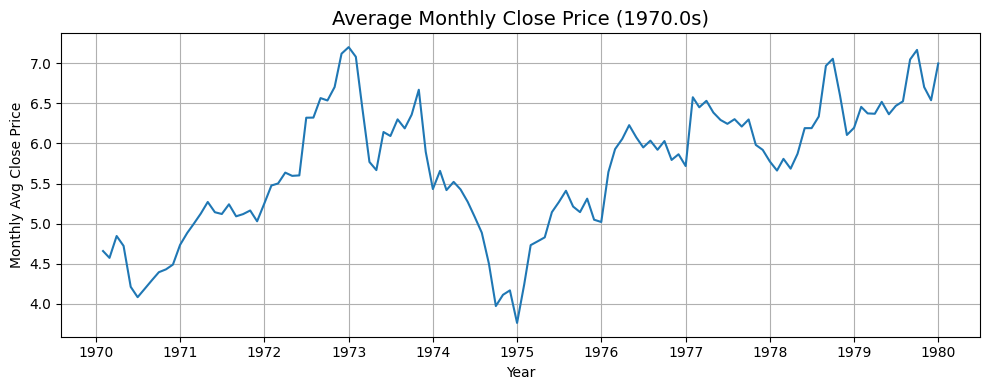

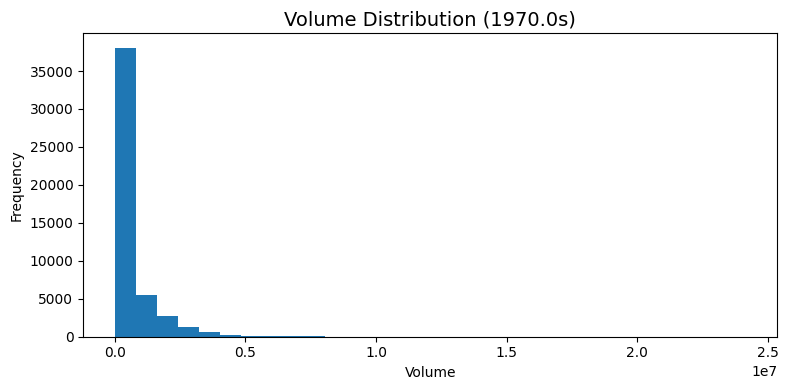

/tmp/ipython-input-1858282902.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


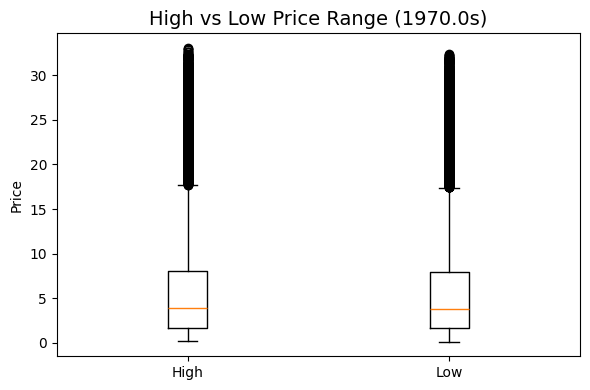


=== Plots for 1980.0s ===


/tmp/ipython-input-1858282902.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df_decade['close'].resample('M').mean()


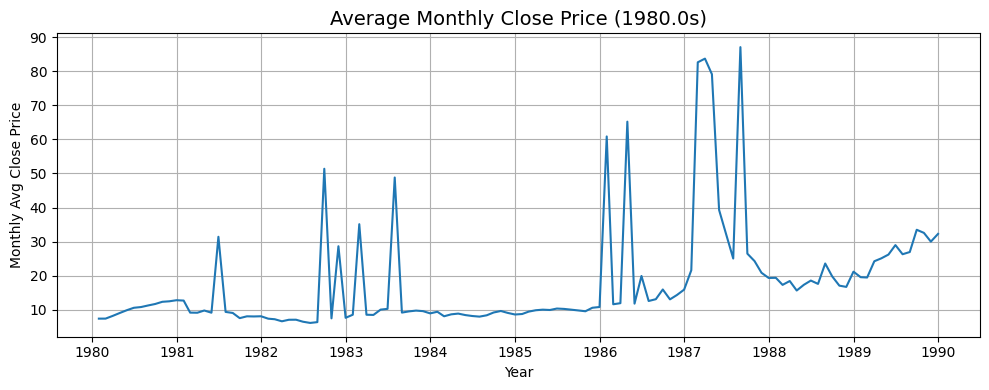

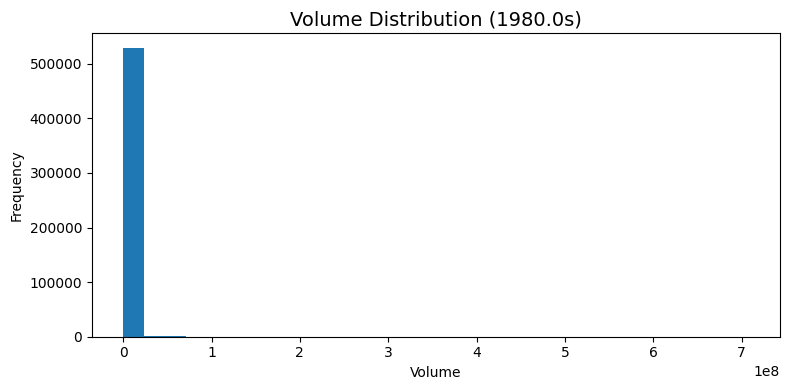

/tmp/ipython-input-1858282902.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


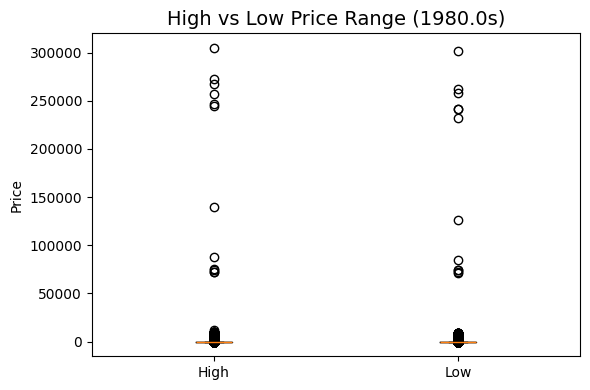


=== Plots for 1990.0s ===


/tmp/ipython-input-1858282902.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df_decade['close'].resample('M').mean()


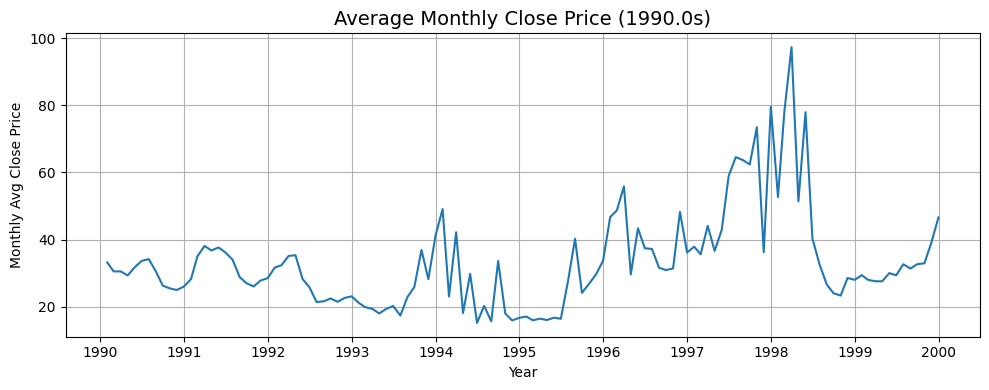

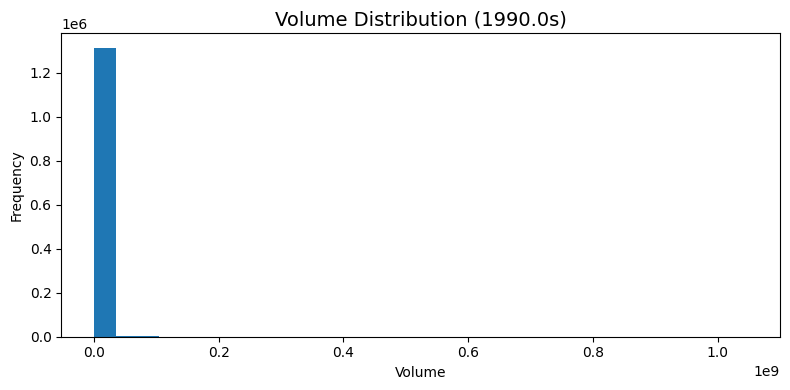

/tmp/ipython-input-1858282902.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


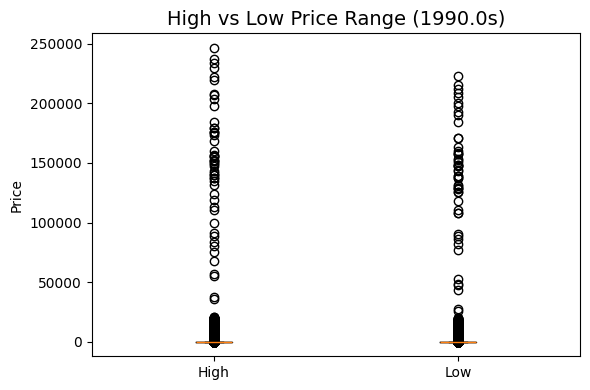


=== Plots for 2000.0s ===


/tmp/ipython-input-1858282902.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df_decade['close'].resample('M').mean()


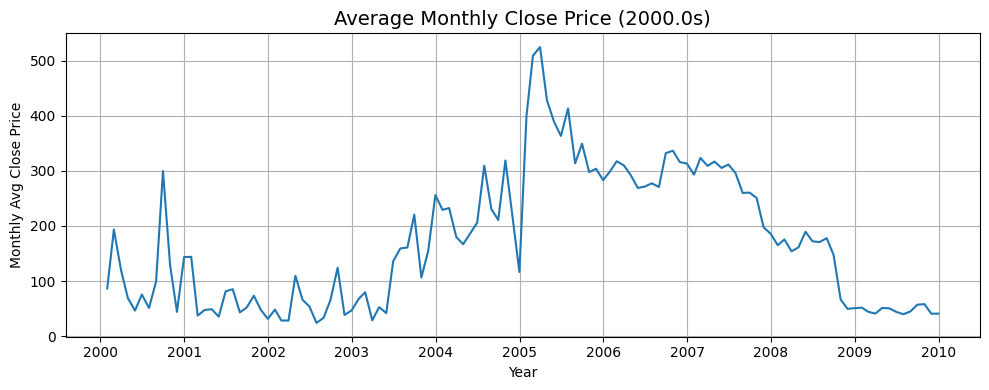

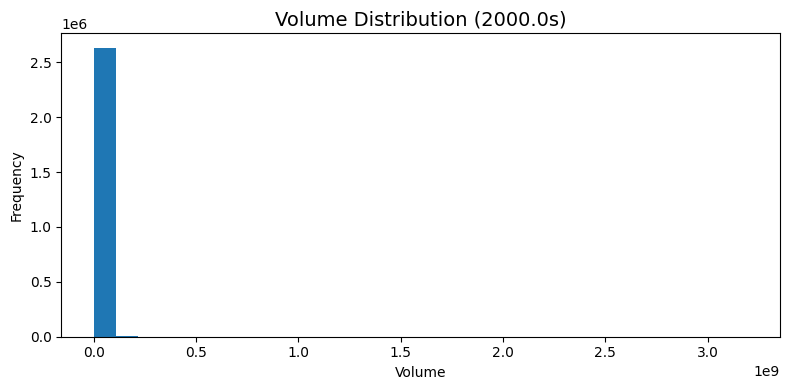

/tmp/ipython-input-1858282902.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


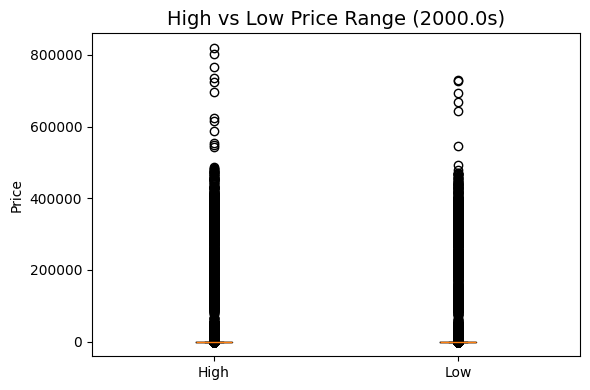


=== Plots for 2010.0s ===


/tmp/ipython-input-1858282902.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df_decade['close'].resample('M').mean()


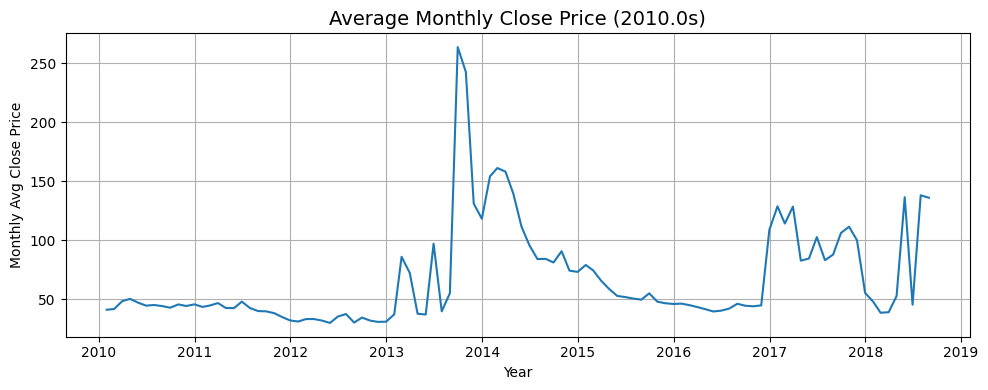

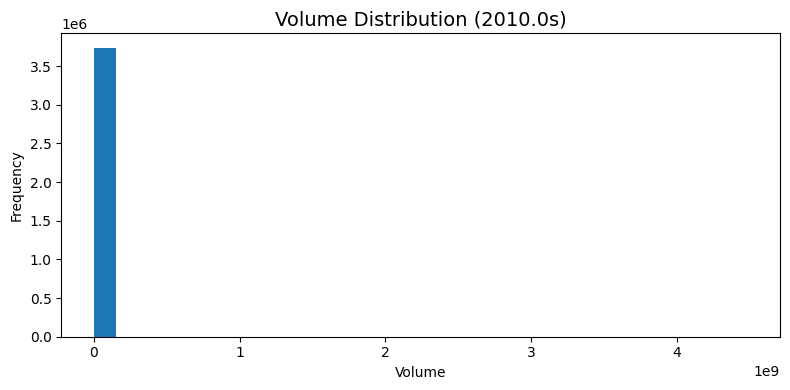

/tmp/ipython-input-1858282902.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


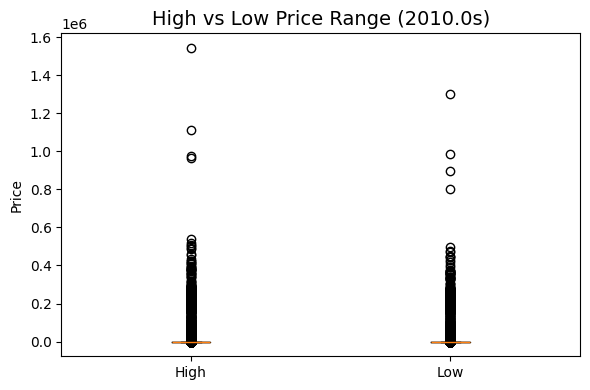

In [21]:
decades_list = sorted(merged['decade'].dropna().unique())

for d in decades_list:

    print(f"\n=== Plots for {d}s ===")

    # Filter data for this decade
    df_decade = merged[merged['decade'] == d]

    # 1️⃣ Time series: average monthly Close price
    monthly_close = df_decade['close'].resample('M').mean()

    plt.figure(figsize=(10, 4))
    plt.plot(monthly_close.index, monthly_close.values)
    plt.title(f"Average Monthly Close Price ({d}s)", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("Monthly Avg Close Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2️⃣ Histogram of Volume
    plt.figure(figsize=(8, 4))
    plt.hist(df_decade['volume'].dropna(), bins=30)
    plt.title(f"Volume Distribution ({d}s)", fontsize=14)
    plt.xlabel("Volume")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # 3️⃣ Box plot for High and Low prices
    plt.figure(figsize=(6, 4))
    plt.boxplot(
        [df_decade['high'].dropna(), df_decade['low'].dropna()],
        labels=['High', 'Low']
    )
    plt.title(f"High vs Low Price Range ({d}s)", fontsize=14)
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1747076840.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = sample_2000s['close'].resample('M').mean()


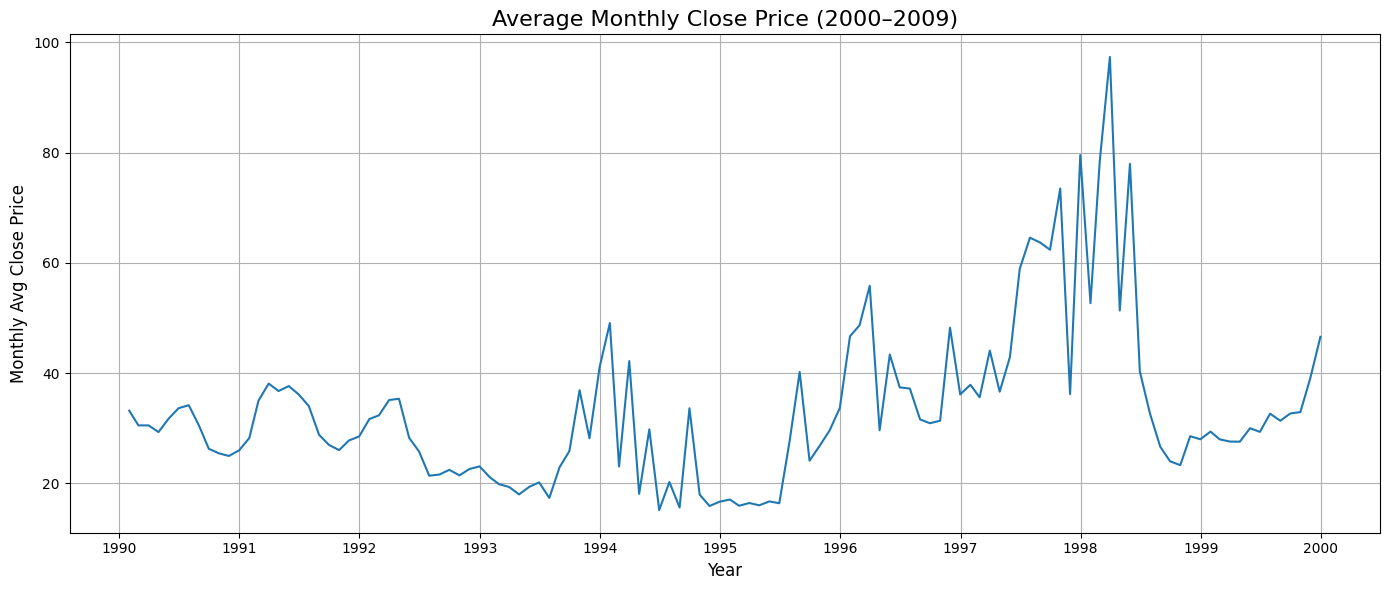

/tmp/ipython-input-1747076840.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = sample_2000s['close'].resample('M').mean()


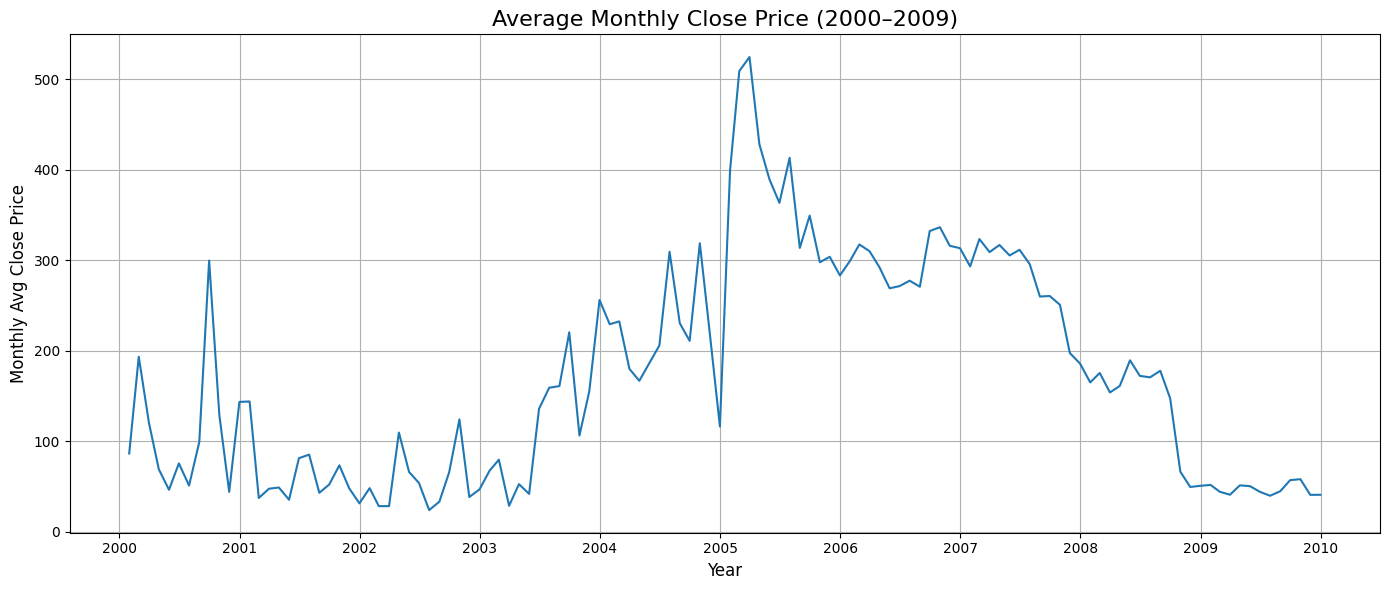

In [22]:
# Instead of daily noise → we create monthly averages
sample_2000s = merged[merged['decade'] == 1990]

# Convert daily data → monthly average
monthly = sample_2000s['close'].resample('M').mean()
plt.figure(figsize=(14,6))
plt.plot(monthly.index, monthly.values)
plt.title("Average Monthly Close Price (2000–2009)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Monthly Avg Close Price", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

sample_2000s = merged[merged['decade'] == 2000]
# Convert daily data → monthly average
monthly = sample_2000s['close'].resample('M').mean()
plt.figure(figsize=(14,6))
plt.plot(monthly.index, monthly.values)
plt.title("Average Monthly Close Price (2000–2009)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Monthly Avg Close Price", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Comparative Analysis

In [23]:
# Build a table of mean Close and Volume by decade
mean_close = {}
mean_volume = {}
std_close = {}

for d, stats in summary_stats.items():
    mean_close[d] = stats["mean"]["close"]
    mean_volume[d] = stats["mean"]["volume"]
    std_close[d] = stats["std"]["close"]

mean_close_series = pd.Series(mean_close, name="Mean Close")
mean_volume_series = pd.Series(mean_volume, name="Mean Volume")
std_close_series = pd.Series(std_close, name="Std Dev Close")

comparison_df = pd.concat([mean_close_series, mean_volume_series, std_close_series], axis=1)
print("\nComparison of decades:")
print(comparison_df)


Comparison of decades:
        Mean Close   Mean Volume  Std Dev Close
1970.0    5.848672  5.666085e+05       5.835535
1980.0   19.932984  7.041959e+05     950.427205
1990.0   34.934916  8.515440e+05     980.304352
2000.0  176.326332  1.557244e+06    6169.309414
2010.0   69.596014  1.504281e+06    2649.974108
